In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/flights.csv')

In [ ]:
data.shape


(144, 3)

In [ ]:
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [ ]:
data['passengers'].value_counts()

229    3
306    2
405    2
242    2
196    2
      ..
191    1
209    1
230    1
218    1
432    1
Name: passengers, Length: 118, dtype: int64

In [ ]:

data.isna().sum()

year          0
month         0
passengers    0
dtype: int64

In [ ]:
data=pd.get_dummies(data)

In [ ]:
data.head()

,year,passengers,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,1949,112,0,0,0,0,1,0,0,0,0,0,0,0
1,1949,118,0,0,0,1,0,0,0,0,0,0,0,0
2,1949,132,0,0,0,0,0,0,0,1,0,0,0,0
3,1949,129,1,0,0,0,0,0,0,0,0,0,0,0
4,1949,121,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
x=data.drop(['passengers'],axis=1)
y=data['passengers']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
x_train.shape

(115, 13)

In [ ]:
# logisticregression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.0
Precision is: 0.0
Recall is: 0.0
F1 score is: 0.0


In [ ]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# knn
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors=np.arange(3,6)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)

In [ ]:
acc_values

[0.0, 0.0, 0.0]

Text(0, 0.5, 'accuracy')

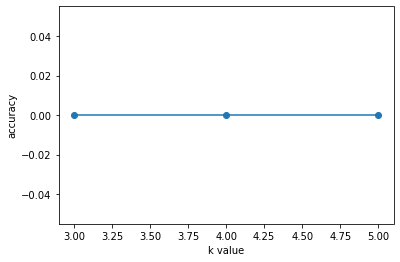

In [ ]:
# we ploted the graph b/w the k-value(neighbour value) and acc_value
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')